In [2]:
import numpy as np
import drawSvg as draw
from random import uniform
import math

C:\Users\mmoud\Anaconda3\lib\site-packages\drawSvg\raster.py:11: RuntimeWarning: CairoSVG will need to be installed to rasterize images: Install with `pip3 install cairosvg`
  warnings.warn(msg, RuntimeWarning)


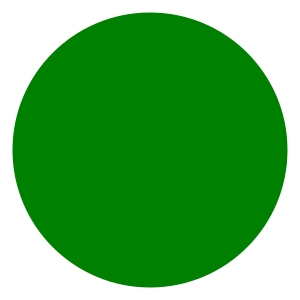

In [6]:
# draw a frame of the animation
def draw_frame(r):
    d = draw.Drawing(300, 300, origin='center')
    d.append(draw.Circle(0, 0, r,
            fill='green')) 
    
    return d
    
#animation - pulsing cuicle 
r =0 
s = 0 #starting radius
R = 140 #stopping radius
runs = 0 # counts number of full expansions and full contraction cycles
sign =1 # direction of expansion(1) and contraction
with draw.animate_jupyter(draw_frame,delay =0.05) as anim:
    while runs<= 10: # what is my stopping critria
        anim.draw_frame(r)
        if (sign ==1): 
            r = r+2.5
        else : 
            r = r-2.5
        if r==R or r == s:
            sign = sign*-1
            runs +=1

In [20]:

# Eye class,
class Eye:
    def __init__(self, x, y, rad, max_run = 10,color='blue'):
        # eye position and size
        self.x = x
        self.y = y
        self.rad = rad

        # eye gaze direction
        self.direction = 0 # not passed in
        r =0 
        self.s = rad#starting radius
        R = 140 #stopping radius
        self.runs = 0 # counts number of full expansions and full contraction cycles
        self.sign =1 # direction of expansion(1) and contraction
        self.max_run = max_run
        # eye color
        self.color = color
    def lookat(self, lx, ly):
        self.direction = math.atan2(ly-self.y, lx-self.x) # move eye to look at (lx,ly)\n",

    def drawEye(self):
        # draw outer circle
        D.append(draw.Circle(self.x, self.y, self.rad, fill='white', stroke='black'))
        # draw inner circle\n",
        ix = 0.4 * self.rad * math.cos(self.direction) + self.x
        iy = 0.4 * self.rad * math.sin(self.direction) + self.y
        D.append(draw.Circle(ix, iy, 0.5*self.rad, fill=self.color, stroke='black'))
        return D
        
    def pulse(self):
        #animation - pulsing cuicle 
     
        with draw.animate_jupyter(self.drawEye,delay =0.05) as anim:
            while runs<= self.max_run: # what is my stopping critria
                anim.draw_frame(self.rad)
                if (self.sign ==1): 
                    self.rad = self.rad+1
                else : 
                    self.rad = self.rad-1
                if self.rad==self.R or self.rad == self.s:
                    self.sign = self.sign*-1
                    self.runs +=1

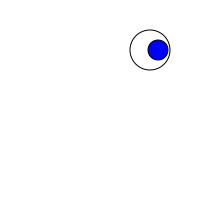

In [21]:
D = draw.Drawing(200, 200, origin='center') 
le = Eye(50,50,20)
le.drawEye()
le.pulse()
D

### Face Class

In [ ]:
# Face class
class Face:
    def __init__(self, x, y, size):
        # face position and size
        self.x = x
        self.y = y
        self.size = size
  
        # create eyes\n",
        self.lefteye = Eye( x-40, y+50, 30 )
        self.righteye = Eye( x+40, y+50, 30 )
        
    def lookat(self, lx, ly):
        self.lefteye.lookat( lx, ly )
        self.righteye.lookat( lx, ly )	
    def drawFace(self):
        # draw face
        D.append(draw.Circle(self.x, self.y, self.size, fill='white', stroke='black'))
        # draw eyes
        self.lefteye.drawEye()
        self.righteye.drawEye()
        
        # draw nose
        p = draw.Path(stroke='black', fill='white')
        p.M(self.x+0,self.y+30)   # Start path 
        p.l(30,-30) # Draw line to next point
        p.l(-30,0)  # Draw line to next point
        D.append(p)
        
        # draw mouth
        D.append(draw.Arc(self.x+0,self.y-30,40,180,0, stroke='black', fill='white'))
    
    #def expandContract(self):
        

In [1]:
D = draw.Drawing(400, 400, origin='center') 
f1 = Face(0,0,100)
f1.drawFace()
D

NameError: name 'draw' is not defined

In [ ]:

class Crowd:
    def __init__(self, N):
        self.N = N
        self.the_crowd = []
        for i in range( 0, N ):
            self.the_crowd.append( Face(uniform(-300,300), uniform(-300,300), 100) )
        #self.lookat()
    
    def lookat(self):
        for i in range( 0, self.N ):
            self.the_crowd[i].lookat( uniform(-5000,5000), uniform(-5000,5000) )
            
    def draw(self):
        for i in range( 0, self.N ):
            self.the_crowd[i].drawFace()
 


In [ ]:
  
# draw crowd   
D = draw.Drawing(800, 800, origin='center') # define drawing canvas\n",
C = Crowd(35)
C.draw()  
D